ts1: [ 1 1.2 ], ts2: [ 1.1 1.3 ]


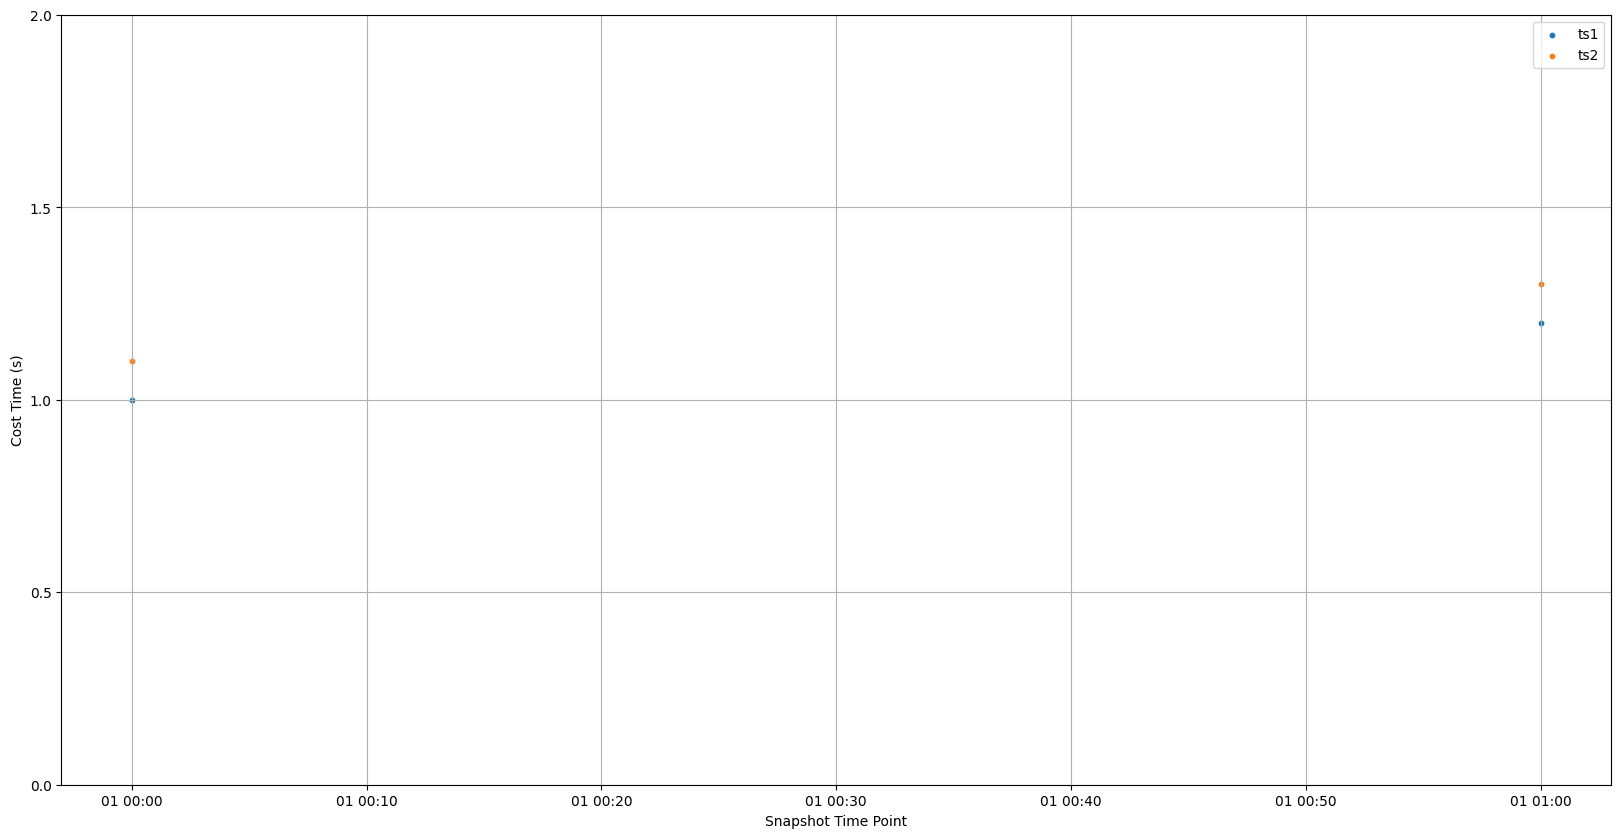

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
import datetime

def plot_array_tuple(arr_tuple, style='green', label=None):
    x = [datetime.datetime.strptime(a, '%Y-%m-%d %H:%M:%S') for (a, _) in arr_tuple]
    y = [b for (_, b) in arr_tuple]
    if label is None:
        p, = plt.plot(x, y, style)
        return p
    else:
        plt.scatter(x, y, label=label, s=10)
        return None

def plot_time_series(ts1, ts2, label1, label2):
    """ts: [('2021-01-01 00:00:00', duration)]"""
    fig = plt.gcf()
    fig.set_size_inches(20, 10)

    plt.xlabel("Snapshot Time Point")
    plt.ylabel("Cost Time (s)")

# scatter
    p1 = plot_array_tuple(ts1, style='g',label=label1)
    p2 = plot_array_tuple(ts2, style='r',label=label2)

# line
#     p1 = plot_array_tuple(ts1, style='g')
#     p2 = plot_array_tuple(ts2, style='r')

    if p1 is not None:
        plt.legend([p1, p2], [label1, label2])
    else:
        _min1 = min([b for (_, b) in ts1])
        _min2 = min([b for (_, b) in ts2])
        _max1 = max([b for (_, b) in ts1])
        _max2 = max([b for (_, b) in ts2])
        print("ts1: [", _min1, _max1, "], ts2: [", _min2, _max2, "]")
        _max = max(_max1-_min1, _max2-_min1)
        if _max >= 10:
            _step = 5
        else:
            _step = 0.5
        plt.yticks(np.arange(min(_min1, _min2) - 1, max(_max1, _max2) + 1, _step))
        plt.legend()

    plt.grid(True)
    plt.show()

    #fig.savefig('ts.png', dpi=100)

ts1 = [('2021-01-01 00:00:00', 1), ('2021-01-01 01:00:00', 1.2)]
ts2 = [('2021-01-01 00:00:00', 1.1), ('2021-01-01 01:00:00', 1.3)]
plot_time_series(ts1,ts2, 'ts1', 'ts2')
